<a href="https://colab.research.google.com/github/iotsync2420/CardioInsight/blob/main/Heart_Disease_AI%2BBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)
from sklearn.metrics import roc_curve, auc

#Load Heart Disease dataset
df=pd.read_csv('/content/sample_data/archive.zip')
df.head()


#Clean & preprocess data
print(df.isnull().sum())
df=df.dropna()
df=df.drop_duplicates()
df.info()
df.describe()

#label encoding
# Encode categorical FEATURES only
for col in df.columns:
    if df[col].dtype == 'object' and col != "Heart Disease":
        df[col] = LabelEncoder().fit_transform(df[col])

# Encode TARGET separately
le_target = LabelEncoder()
df["Heart Disease"] = le_target.fit_transform(df["Heart Disease"])

#seperate features and targets

X = df.drop("Heart Disease", axis=1)
y = df["Heart Disease"]
#Feature scaling
scaler=StandardScaler()
X=scaler.fit_transform(X)


#Train–test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null  

In [ ]:
#training models :
#logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy LR:", accuracy)

#svm

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy SVM:", accuracy)

#random forest

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy RF:", accuracy)

#XG Boost
Xgb = XGBClassifier()
Xgb.fit(X_train, y_train)
y_pred = Xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy XGB:", accuracy)


Accuracy LR: 0.9074074074074074
Accuracy SVM: 0.8888888888888888
Accuracy RF: 0.8703703703703703
Accuracy XGB: 0.8148148148148148


In [ ]:
# 1. Raw split (for RF & XGB)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 2. Scaled split (for LR & SVM)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,
    random_state=42
)
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb, X, y, cv=5, scoring='f1')
print(scores.mean())
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 150]
}

grid = GridSearchCV(
    XGBClassifier(random_state=42),
    param_grid,
    scoring='f1',
    cv=5
)

grid.fit(X_train, y_train)


Best XGB Accuracy: 0.7962962962962963


In [ ]:
#models
# Logistic Regression
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# SVM
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# Random Forest
rf.fit(X_train_raw, y_train)
y_pred_rf = rf.predict(X_test_raw)

# XGBoost
Xgb.fit(X_train_raw, y_train)
y_pred_xgb = Xgb.predict(X_test_raw)


In [ ]:



def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=["Absence", "Presence"]
    )
    disp.plot(cmap="Blues", values_format="d")
    plt.title(title)
    plt.show()   # displays BELOW the cell





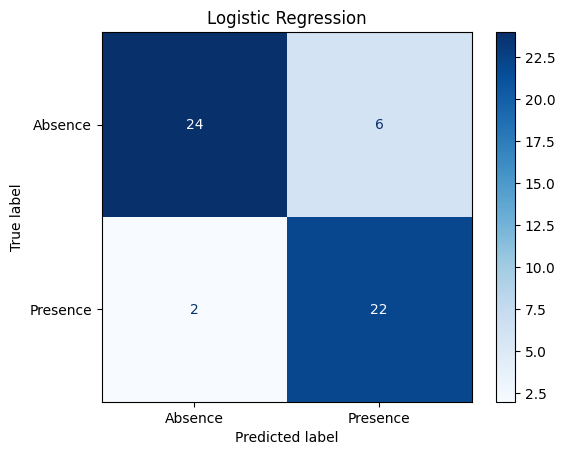

In [ ]:
#confusion matrix plot
plot_cm(y_test, y_pred_lr, 'Logistic Regression')


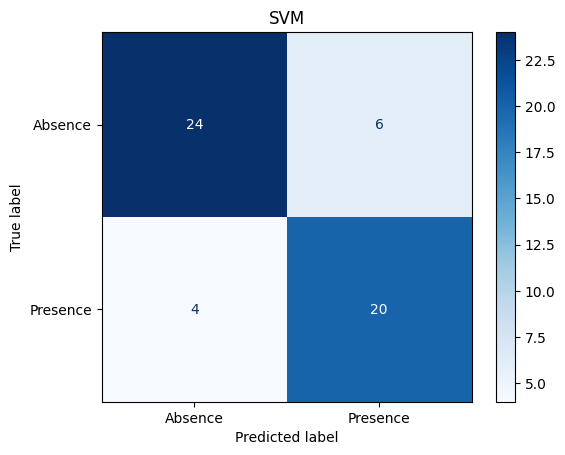

In [ ]:
plot_cm(y_test, y_pred_svm, 'SVM')


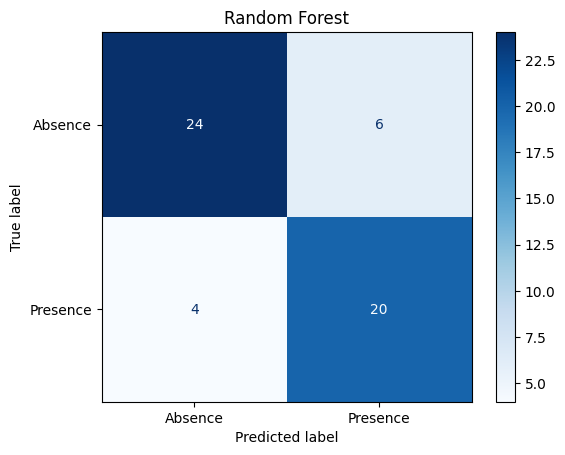

In [ ]:
plot_cm(y_test, y_pred_rf, 'Random Forest')


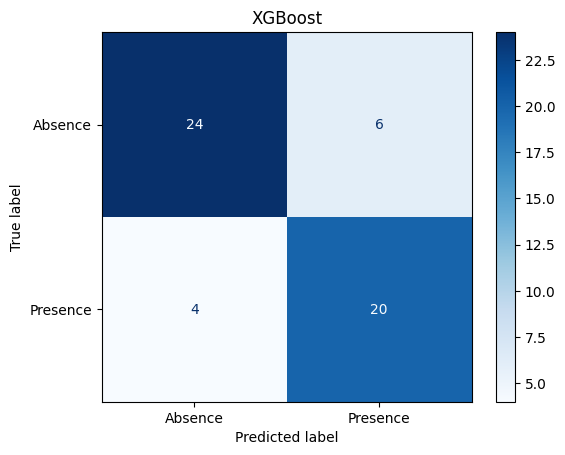

In [ ]:
plot_cm(y_test, y_pred_xgb, 'XGBoost')

In [ ]:
#predictions and probability
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]


svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)
y_prob_svm = svm.predict_proba(X_test_scaled)[:, 1]


y_pred_rf = rf.predict(X_test_raw)
y_prob_rf = rf.predict_proba(X_test_raw)[:, 1]


y_pred_rf = rf.predict(X_test_raw)
y_prob_rf = rf.predict_proba(X_test_raw)[:, 1]

y_pred_xgb = Xgb.predict(X_test_raw)
y_prob_xgb = Xgb.predict_proba(X_test_raw)[:, 1]


In [ ]:
def evaluate_model(name, y_true, y_pred, y_prob=None):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # ROC-AUC needs probability scores
    roc = roc_auc_score(y_true, y_prob) if y_prob is not None else None

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    print(f"\n{name}")
    print("-" * len(name))
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1-score  : {f1:.4f}")
    print(f"ROC-AUC   : {roc:.4f}")
    print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")

    return {
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "ROC-AUC": roc,
        "TP": tp,
        "TN": tn,
        "FP": fp,
        "FN": fn
    }


In [ ]:
results = []

results.append(evaluate_model("Logistic Regression", y_test, y_pred_lr, y_prob_lr))
results.append(evaluate_model("SVM", y_test, y_pred_svm, y_prob_svm))
results.append(evaluate_model("Random Forest", y_test, y_pred_rf, y_prob_rf))
results.append(evaluate_model("XGBoost", y_test, y_pred_xgb, y_prob_xgb))



Logistic Regression
-------------------
Accuracy  : 0.8519
Precision : 0.7857
Recall    : 0.9167
F1-score  : 0.8462
ROC-AUC   : 0.8986
TP: 22, TN: 24, FP: 6, FN: 2

SVM
---
Accuracy  : 0.8148
Precision : 0.7692
Recall    : 0.8333
F1-score  : 0.8000
ROC-AUC   : 0.8861
TP: 20, TN: 24, FP: 6, FN: 4

Random Forest
-------------
Accuracy  : 0.8148
Precision : 0.7692
Recall    : 0.8333
F1-score  : 0.8000
ROC-AUC   : 0.8583
TP: 20, TN: 24, FP: 6, FN: 4

XGBoost
-------
Accuracy  : 0.8148
Precision : 0.7692
Recall    : 0.8333
F1-score  : 0.8000
ROC-AUC   : 0.8653
TP: 20, TN: 24, FP: 6, FN: 4


In [ ]:
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC,TP,TN,FP,FN
0,Logistic Regression,0.851852,0.785714,0.916667,0.846154,0.898611,22,24,6,2
1,SVM,0.814815,0.769231,0.833333,0.800000,0.886111,20,24,6,4
2,Random Forest,0.814815,0.769231,0.833333,0.800000,0.858333,20,24,6,4
3,XGBoost,0.814815,0.769231,0.833333,0.800000,0.865278,20,24,6,4


In [ ]:
# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = auc(fpr_lr, tpr_lr)

# SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
auc_svm = auc(fpr_svm, tpr_svm)

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)


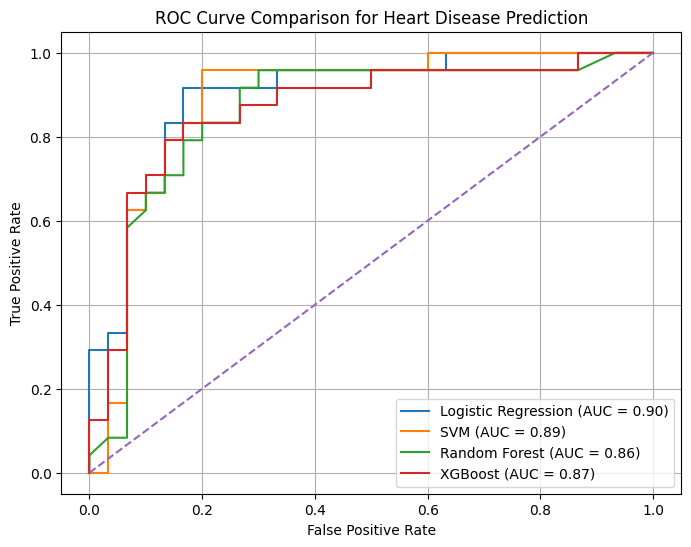

In [ ]:
plt.figure(figsize=(8,6))

plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})")

# Random guess line
plt.plot([0,1], [0,1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison for Heart Disease Prediction")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
#dataframe to csv
results_df.to_csv("model_evaluation_results.csv", index=False)
print("CSV file saved")


CSV file saved


In [ ]:
from google.colab import files
files.download("model_evaluation_results.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>